# 2022-2023 Example

In [78]:
import pandas as pd
import json
from datetime import datetime, timedelta
pd.set_option('display.max_columns', None)

## Datasets

In [94]:
av_obs_df = pd.read_csv('../data/fac_avalanche_2022_2023.csv')
obs_df = pd.read_csv('../data/fac_obs_2022_2023.csv')
forecast_df = pd.read_csv('../data/fac_forecast_2022_2023.csv')
weather_df = pd.read_csv('../data/fac_weather_2022_2023.csv')
forecast_df['problems'] = forecast_df['problems'].apply(lambda x:json.loads(x))

# Example: Feb 8 2023

In [45]:
date = '2023-02-08'
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday = weekdays[pd.to_datetime(date).weekday()]
print(weekday)

Wednesday


# 1. Shown to Hindcaster

## 1.1 Observations Leading Up to Hindcast Date
##### Please review all observations on the week prior to your hindcast date of Feb 8, 2023, both the avalanche tab and the observations tab
##### Questions to Blase: 
1)Should we filter these on FAC forecasters and professionals only?
<br>2)Privately submitted obs?
<br>3) How do forecasters typically consume this information/how can we best replicate that in the hindcast UI

In [119]:
date_obj = datetime.strptime(date, '%Y-%m-%d')
day_prior = date_obj - timedelta(days=1)
seven_days_prior = date_obj - timedelta(days=7)
day_prior_str = day_prior.strftime('%Y-%m-%d')
next_day_str = (date_obj + timedelta(days=1)).strftime('%Y-%m-%d')
seven_days_prior_str = seven_days_prior.strftime('%Y-%m-%d')
link = f"https://flatheadavalanche.org/observations/read-observations/#/view/observations?startDate=%22{seven_days_prior_str}%22&endDate=%22{day_prior_str}%22&season={2023}"

In [52]:
from IPython.display import IFrame
display(IFrame(link, width=700, height=400))

## 1.2 Forecasted Danger and Problems for Feb 7 2023

In [117]:
previous_forecast_rows

,author,date,zone,forecast,problems,bottom_line,discussion
61,Cam Johnson,2023-02-07,Whitefish Range,"{'upper': 'Moderate', 'middle': 'Moderate', 'l...","[{'problem_type': ' Wind Slab', 'problem_numbe...",Moderate wind speeds out of the southwest cont...,A pacific cold front approaching the forecast ...
189,Cam Johnson,2023-02-07,Swan Range,"{'upper': 'Moderate', 'middle': 'Moderate', 'l...","[{'problem_type': ' Persistent Slab', 'problem...",Avoid areas where you see snow being transport...,A pacific cold front approaching the forecast ...
318,Cam Johnson,2023-02-07,Flathead Range & Glacier NP,"{'upper': 'Moderate', 'middle': 'Moderate', 'l...","[{'problem_type': ' Persistent Slab', 'problem...",Sustained winds out of the southwest continue ...,A pacific cold front approaching the forecast ...


In [59]:
previous_forecast_rows = forecast_df[forecast_df.date == day_prior_str].drop(columns = 'Unnamed: 0')
for zone, forecast in zip(previous_forecast_rows.zone, previous_forecast_rows.forecast):
    print(f'\n\n--------{zone}')
    print(f'Forecast:{forecast}')
for zone, problems in zip(previous_forecast_rows.zone, previous_forecast_rows.problems):
    print(f'\n\n\n--------{zone}')
    sorted_avalanche_problems = sorted(problems, key=lambda x: x['problem_number'])
    for problem in sorted_avalanche_problems:
        print(f"Problem Type: {problem['problem_type']}")
        print(f"Problem Number: {problem['problem_number']}")
        print(f"Likelihood: {problem['likelihood']}")
        print(f"Size: {', '.join([size for size in problem['size'] if size])}")
        aspect_elevation_str = " | ".join([f"{key.capitalize()}: {', '.join(values)}" for key, values in problem['aspect_elevation'].items() if values])
        print(f"Aspect/Elevation: {aspect_elevation_str}")
        print(f"Discussion: {problem['discussion']}")
        print("\n" + "-"*50 + "\n")



--------Whitefish Range
Forecast:{'upper': 'Moderate', 'middle': 'Moderate', 'lower': 'Low'}


--------Swan Range
Forecast:{'upper': 'Moderate', 'middle': 'Moderate', 'lower': 'Low'}


--------Flathead Range & Glacier NP
Forecast:{'upper': 'Moderate', 'middle': 'Moderate', 'lower': 'Low'}



--------Whitefish Range
Problem Type:  Wind Slab
Problem Number: 1
Likelihood: possible
Size: Small (D1), Large (D2)
Aspect/Elevation: Upper: north, northeast, east, southeast, northwest | Middle: north, northeast, east, southeast, northwest
Discussion: Relentless moderate and strong winds out of the southwest continue to drift snow into firm slabs. Hard slabs of drifted snow can break above you and easily sweep you off your feet. These will be more sensitive to the weight of a rider where they rest over buried weak layers. Identify areas of concern by textured surfaces or dune-shaped drifts. Cracking around your feet or machine is a sign that slabs may be ripe for human triggering. Utilize small

## 1.3 Forecasted Weather on the Morning of Feb 8 2023

#### This weather info is just from the av forecast.  Should get better data here

In [105]:
weather = weather_df[weather_df.date==date]
areas = ['Whitefish Range','Swan Range','Flathead Range & Glacier NP']
for area in areas:
    display(area)
    display(weather[weather[area].notnull()][[area,'Weather Forecast for Today']])

'Whitefish Range'

,Whitefish Range,Weather Forecast for Today
360,Cloud Cover,Mostly Cloudy
361,Temperatures,21 to 28 ° F
362,Wind Direction,West
363,Wind Speed,24G53
364,Snowfall,"1"" to 2"""
365,Snow Line,1500'


'Swan Range'

,Swan Range,Weather Forecast for Today
1128,Cloud Cover,Mostly Cloudy
1129,Temperatures,21 to 25 ° F
1130,Wind Direction,West
1131,Wind Speed,29G63
1132,Snowfall,"4"" to 6"""
1133,Snow Line,1500'


'Flathead Range & Glacier NP'

,Flathead Range & Glacier NP,Weather Forecast for Today
1902,Cloud Cover,Mostly Cloudy
1903,Temperatures,18 to 25 ° F
1904,Wind Direction,West
1905,Wind Speed,29G63
1906,Snowfall,"2"" to 4"""
1907,Snow Line,1500'


## 1.4 Actual Weather on Feb 8 2023

In [ ]:
# toby

In [107]:
weather = weather_df[weather_df.date==next_day_str]
areas = ['Whitefish Range','Swan Range','Flathead Range & Glacier NP']
yesterday_cols = [col for col in weather.columns if '24hrs' in col]
for area in areas:
    display(area)
    
    subdf = weather[weather[area].notnull()]
    non_null_yesterday_cols = [col for col in yesterday_cols if subdf[col].notnull().any()]
    display(subdf[[area] + non_null_yesterday_cols])

'Whitefish Range'

,Whitefish Range,Conditions in the last 24hrsWMR Summit
354,Cloud Cover,Mostly Cloudy
355,Temperatures,Low: 14° F | High: 22° F
356,Wind Direction,Southwest
357,Wind Speed,11G29mph
358,Snowfall,Trace
359,Snow Line,1500'


'Swan Range'

,Swan Range,Conditions in the last 24hrsNoisy Basin/Aeneas Ridge
1122,Cloud Cover,Mostly Cloudy
1123,Temperatures,Low: 22° F | High: 28° F
1124,Wind Direction,Southwest
1125,Wind Speed,5G24mph
1126,Snowfall,Trace
1127,Snow Line,1500'


'Flathead Range & Glacier NP'

,Flathead Range & Glacier NP,Conditions in the last 24hrs
1896,Cloud Cover,Mostly Cloudy
1897,Temperatures,Low: 14° F | High: 22° F
1898,Wind Direction,Southwest
1899,Wind Speed,12G24mph
1900,Snowfall,Trace
1901,Snow Line,1500'


## 1.5 Observations ON Feb 8 2023
#### Please review all observations on the DAY of your hindcast date of Feb 8, 2023, both the avalanche tab and the observations tab

In [53]:
link = f"https://flatheadavalanche.org/observations/read-observations/#/view/observations?startDate=%22{date_obj}%22&endDate=%22{date_obj}%22&season={2023}"
display(IFrame(link, width=700, height=400))

### 1.2.1 Summary of Observations on Hindcast Date

In [96]:
from dateutil.parser import parse
import re
def convert_to_iso_format(date_str):
    match = re.search(r'(\bJan\b|\bFeb\b|\bMar\b|\bApr\b|\bMay\b|\bJun\b|\bJul\b|\bAug\b|\bSep\b|\bOct\b|\bNov\b|\bDec\b)\s+\d{1,2},\s+\d{4}', date_str)
    if match:
        date_part = match.group()
        date = parse(date_part, fuzzy=True)
        return date.strftime('%Y-%m-%d')
    else:
        return "Invalid date format"

In [104]:
obs = obs_df[obs_df['date']==date]
for observer in ['forecaster','public']:
    print(f'\n\n\n----\n{observer}')
    for summary in obs[obs['Observer type']==observer]['Observation Summary']:
        print(f'\n--\n{summary}')




----
forecaster

--
Into the Swan! Let's see what this storm left for us:
-We found exceptional riding with 4-10 inches of recent snow.  
-We noticed a handful of small, natural soft slab avalanches that failed in wind drifted snow during the last week. 
-We stomped though wind drifted snow with minimal cracking. 
-Cornice were growing and we were able to chunk off the top 30cm with some jumping. 
-We found buried surface hoar 55-90cm deep in our testpits.
-An extended column test at 7200 feet, NE aspect produced a propagating result with moderate force.
We backed away from riding a steep, treed bowl.

--
Today we were Flathead bound to observe snow totals and see how sensitive freshly formed wind slabs are. We also wanted to assess buried weak layers in the upper snowpack.
- We initiated many shooting cracks and triggered a few very small slabs. We skied a windward aspect and found isolated pockets throughout our descent. 
- Freshly formed drifts were thicker, but stubborn on more 

## 1.6 AAI On Feb 8, 2023

In [ ]:
### implement

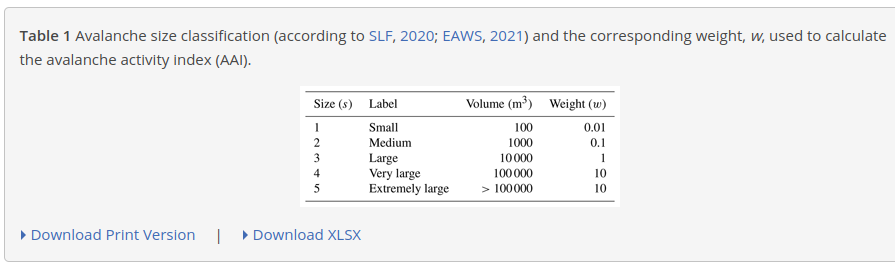

^^ Use this from SLF?  Revisit CAIC paper too

## 1.7 Questions

In [116]:
with open('form_html', 'r') as f:
    form_html = f.read()

from IPython.core.display import display, HTML
display(HTML(form_html))

/tmp/ipykernel_1253312/1037000810.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# 2 Not shown: Actual forecast

In [46]:
actual_forecast_rows = forecast_df[forecast_df.date == date].drop(columns = 'Unnamed: 0')
actual_forecast_rows

,author,date,zone,forecast,problems,bottom_line,discussion
60,Sarah Williams,2023-02-08,Whitefish Range,"{'upper': 'Considerable', 'middle': 'Moderate'...","[{'problem_type': ' Wind Slab', 'problem_numbe...",You will find dangerous avalanche conditions a...,Both natural and human-triggered avalanches ha...
188,Sarah Williams,2023-02-08,Swan Range,"{'upper': 'Considerable', 'middle': 'Moderate'...","[{'problem_type': ' Persistent Slab', 'problem...",You will find dangerous avalanche conditions a...,Both natural and human-triggered avalanches ha...
317,Sarah Williams,2023-02-08,Flathead Range & Glacier NP,"{'upper': 'Considerable', 'middle': 'Moderate'...","[{'problem_type': ' Persistent Slab', 'problem...",You will find dangerous avalanche conditions a...,Both natural and human-triggered avalanches ha...


### 2.1 Not Shown: Actual Forecasted Danger

In [47]:
print(actual_forecast_rows.iloc[0].bottom_line)

You will find dangerous avalanche conditions at upper elevations, as a result of southwesterly winds and new snow.  Steer around these freshly built slabs on leeward slopes and ridgelines. Consider the consequence of a slide before committing to avalanche terrain. 


In [49]:
for zone, forecast in zip(actual_forecast_rows.zone, actual_forecast_rows.forecast):
    print(f'\n\n--------{zone}')
    print(f'Forecast:{forecast}')



--------Whitefish Range
Forecast:{'upper': 'Considerable', 'middle': 'Moderate', 'lower': 'Low'}


--------Swan Range
Forecast:{'upper': 'Considerable', 'middle': 'Moderate', 'lower': 'Low'}


--------Flathead Range & Glacier NP
Forecast:{'upper': 'Considerable', 'middle': 'Moderate', 'lower': 'Low'}


### 2.2 Not Shown: Actual Forecasted Problems

In [50]:
for zone, problems in zip(actual_forecast_rows.zone, actual_forecast_rows.problems):
    print(f'\n\n\n--------{zone}')
    sorted_avalanche_problems = sorted(problems, key=lambda x: x['problem_number'])
    for problem in sorted_avalanche_problems:
        print(f"Problem Type: {problem['problem_type']}")
        print(f"Problem Number: {problem['problem_number']}")
        print(f"Likelihood: {problem['likelihood']}")
        print(f"Size: {', '.join([size for size in problem['size'] if size])}")
        aspect_elevation_str = " | ".join([f"{key.capitalize()}: {', '.join(values)}" for key, values in problem['aspect_elevation'].items() if values])
        print(f"Aspect/Elevation: {aspect_elevation_str}")
        print(f"Discussion: {problem['discussion']}")
        print("\n" + "-"*50 + "\n")




--------Whitefish Range
Problem Type:  Wind Slab
Problem Number: 1
Likelihood: likely
Size: Small (D1), Large (D2)
Aspect/Elevation: Upper: north, northeast, east, southeast, northwest | Middle: north, northeast, east, southeast, northwest
Discussion: Southwesterly winds will continue transporting the new snow near and below ridgelines into 1 to 3-foot slabs. To find these, use your hand or ski pole to feel the texture of the near-surface snow. If it is stiffer or more consolidated, you've found a drift that may be dangerous– if it's on a slope steeper than about 35 degrees and more than about 8 inches thick.  Overnight, weather stations recorded sustained winds capable of transporting snow in all forecast zones. Moderate winds with strong gusts are expected today and, thus, will continue to blow snow into firm slabs. Cracking around your machine or boards is a clue that you've found an unstable slab. Pay attention to the consequences of being caught in even a small slide, as terrai